<a href="https://colab.research.google.com/github/Emekus50/predictive-analytics/blob/main/Network_Security_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
import pandas as pd
import numpy as np

In [144]:
data = pd.read_csv('merged_dataset.csv')

<ipython-input-144-53a78f1fa5b1>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('merged_dataset.csv')


In [145]:
data

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0.0,3.0,7.0,1.0,3.0,1.0,1.0,1.0,NaN,0.0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,NaN,0.0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0.0,12.0,8.0,1.0,2.0,2.0,1.0,1.0,NaN,0.0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0.0,6.0,9.0,1.0,1.0,1.0,1.0,1.0,NaN,0.0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0.0,7.0,9.0,1.0,1.0,1.0,1.0,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54445,59.166.0.2,16593,149.171.126.4,53,udp,CON,0.001032,146,178,31,...,0.0,2.0,3.0,4.0,3.0,1.0,1.0,1.0,NaN,0.0
54446,59.166.0.7,3625,149.171.126.4,53,udp,CON,0.001409,132,164,31,...,0.0,3.0,3.0,4.0,8.0,1.0,1.0,1.0,NaN,0.0
54447,59.166.0.9,63636,149.171.126.9,44667,tcp,FIN,0.035885,3598,48710,31,...,0.0,10.0,3.0,2.0,3.0,1.0,1.0,1.0,NaN,0.0
54448,59.166.0.2,37274,149.171.126.2,5190,tcp,FIN,0.008049,2158,2478,31,...,0.0,6.0,12.0,4.0,3.0,1.0,1.0,1.0,NaN,0.0


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54450 entries, 0 to 54449
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   srcip             54450 non-null  object 
 1   sport             54450 non-null  object 
 2   dstip             54450 non-null  object 
 3   dsport            54450 non-null  object 
 4   proto             54450 non-null  object 
 5   state             54450 non-null  object 
 6   dur               54450 non-null  float64
 7   sbytes            54450 non-null  int64  
 8   dbytes            54450 non-null  int64  
 9   sttl              54450 non-null  int64  
 10  dttl              54450 non-null  int64  
 11  sloss             54450 non-null  int64  
 12  dloss             54450 non-null  int64  
 13  service           54450 non-null  object 
 14  Sload             54450 non-null  float64
 15  Dload             54450 non-null  float64
 16  Spkts             54450 non-null  int64 

In [147]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Create an empty list to store columns with alphanumeric or special characters
columns_with_strings = []

# Iterate over each column
for column in data.columns:
    # Check if any element in the column contains alphanumeric or special characters
    if data[column].apply(lambda x: isinstance(x, str) and any(char.isalnum() or not char.isspace() for char in x)).any():
        columns_with_strings.append(column)

# Print columns with alphanumeric or special characters
print("Columns with alphanumeric or special characters:")
for column in columns_with_strings:
    print(column)


Columns with alphanumeric or special characters:
srcip
sport
dstip
dsport
proto
state
service
attack_cat


In [148]:
# # To print the Unique values in each of the columns containing strings
# # Iterate over each column
# for column in ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service', 'ct_ftp_cmd', 'attack_cat']:
#     # Print the column name
#     print("Unique values in column '{}':".format(column))
#     # Remove leading and trailing whitespaces and then print the unique values in the column
#     print(data[column].str.strip().unique())
#     print()  # Add an empty line for better readability


In [149]:
# Checking for strings in the different columns
# non_numeric_dsport = data[~data['srcip'].astype(str).str.isdigit()]['srcip'].unique()
# print(non_numeric_dsport)


In [150]:
# Atempting to find empty or whitespace only cells column-by-column
# Find unique values in the 'srcip' column that are empty (i.e., contain only whitespace characters)
empty_srcip = data[data['dsport'].astype(str).str.strip() == ' ']['dsport'].unique()
print(empty_srcip)


[]


In [151]:
# # Serch for columns with an empty cell
# # This worked
# #Iterate over each cell in the DataFrame
# empty_cells = []
# for col in data.columns:
#     for value in data[col]:
#         # Check if the value is a string and contains only whitespace characters
#         if isinstance(value, str) and value.strip() == '':
#             empty_cells.append((col, value))

# # Print the list of empty cells
# if empty_cells:
#     print("Empty cells found:")
#     for cell in empty_cells:
#         print("Column:", cell[0], "- Value:", cell[1])
# else:
#     print("No empty cells found.")


#     # it found over 2million empties of Column: ct_ftp_cmd - Value.
#     # Hence dropped below

In [152]:
data.drop(['ct_ftp_cmd'], axis=1, inplace=True)

In [153]:
# # Count the number of empty cells in the 'ct_ftp_cmd' column
# empty_cell_count = sum(data['ct_ftp_cmd'].astype(str).str.strip() == '')

# # Print the count of empty cells
# print("Number of empty cells in the 'ct_ftp_cmd' column:", empty_cell_count)


In [154]:
# Checking orreconfirming that there are no other columns with empty spaces

# Serch for columns with an empty cell
# This worked
#Iterate over each cell in the DataFrame
empty_cells = []
for col in data.columns:
    for value in data[col]:
        # Check if the value is a string and contains only whitespace characters
        if isinstance(value, str) and value.strip() == '':
            empty_cells.append((col, value))

# Print the list of empty cells
if empty_cells:
    print("Empty cells found:")
    for cell in empty_cells:
        print("Column:", cell[0], "- Value:", cell[1])
else:
    print("No empty cells found.")


    # Column: ct_ftp_cmd - Value:


No empty cells found.


In [155]:
# Replacing the Empty cells of Attack_cat that match or represent normal traffice as normal
data['attack_cat'].fillna('normal', inplace=True)

In [156]:
# Remove leading and trailing whitespace from the 'attack_cat' column
data['attack_cat'] = data['attack_cat'].str.strip()



In [157]:
data['attack_cat'].value_counts()

attack_cat
normal            50378
Fuzzers            1571
Exploits           1423
Reconnaissance      528
DoS                 248
Generic             205
Shellcode            68
Backdoors            22
Worms                 7
Name: count, dtype: int64

In [158]:
# Checking for Strings that are not numerical nor non-numerical
non_numeric_dsport = data[~data['sport'].astype(str).str.isdigit()]['sport'].unique()
print(non_numeric_dsport)


['0x000b' '0x000c']


In [159]:
# Checking for Strings that are not numerical nor non-numerical
non_numeric_dsport = data[~data['dsport'].astype(str).str.isdigit()]['dsport'].unique()
print(non_numeric_dsport)


['0xc0a8' '-']


In [160]:
non_alpha_attack_cat = data[~data['attack_cat'].str.strip().str.isalpha()]['attack_cat'].unique()
print(non_alpha_attack_cat)


[]


Replacing the discovered strings with the most frequent unique value of the corresponding feature

In [161]:
data['state'].replace('-', 'Fin', inplace=True)

In [162]:
data['service'].replace('-', 'others', inplace=True)

In [163]:
data['dsport'].replace('0xc0a8', 53, inplace=True)
data['dsport'].replace('0xcc09', 53, inplace=True)
data['dsport'].replace('0x20205321', 53, inplace=True)
data['dsport'].replace('-', 53, inplace=True)

In [164]:
data['sport'].replace('0x000c', 0, inplace=True)
data['sport'].replace('0x20205321', 0, inplace=True)
data['sport'].replace('0x000b', 0, inplace=True)
data['sport'].replace('-', 0, inplace=True)

In [165]:
data['proto'].replace('-', 'tcp', inplace=True)

In [166]:
data['dstip'].replace('-', '149.171.126.4', inplace=True)

In [167]:
data['srcip'].replace('-', '59.166.0.2', inplace=True)

In [168]:
# Replace NaN values with 0 in the 'ct_flw_http_mthd' and 'is_ftp_login' columns
data['ct_flw_http_mthd'].fillna(0, inplace=True)
data['is_ftp_login'].fillna(0, inplace=True)

In [169]:
data['sport']

0         1390
1        33661
2         1464
3         3593
4        49664
         ...  
54445    16593
54446     3625
54447    63636
54448    37274
54449     5301
Name: sport, Length: 54450, dtype: object

In [170]:
# Confirm that (-) has been replaced
has_hyphen = '-' in data['sport'].values
print("Does the 'sport' column contain a hyphen (-) character?", has_hyphen)


Does the 'sport' column contain a hyphen (-) character? False


In [171]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

# Encode the "proto" column
data.loc[:, 'proto'] = np.array(encoder.fit_transform(data.loc[:, 'proto'].to_numpy().reshape(-1, 1))) # For Proto
data.loc[:, 'state'] = np.array(encoder.fit_transform(data.loc[:, 'state'].to_numpy().reshape(-1, 1))) # For State
data.loc[:, 'attack_cat'] = np.array(encoder.fit_transform(data.loc[:, 'attack_cat'].to_numpy().reshape(-1, 1))) # For Attack_Cat
data.loc[:, 'service'] = np.array(encoder.fit_transform(data.loc[:, 'service'].to_numpy().reshape(-1, 1))) # For Attack_Cat

In [172]:
data['attack_cat'].value_counts()

attack_cat
8.0    50378
3.0     1571
2.0     1423
5.0      528
1.0      248
4.0      205
6.0       68
0.0       22
7.0        7
Name: count, dtype: int64

In [173]:
data['service'].value_counts()

service
6.0     30551
1.0      9328
4.0      5883
3.0      3302
9.0      2239
11.0     1705
2.0      1319
7.0        91
12.0       14
10.0        7
8.0         5
5.0         3
0.0         3
Name: count, dtype: int64

In [174]:
data['proto'].value_counts()

proto
11.0    39253
12.0    14457
0.0       328
4.0       216
1.0        78
7.0        32
8.0        20
5.0        14
9.0        14
10.0       14
3.0        14
2.0         8
13.0        1
6.0         1
Name: count, dtype: int64

In [175]:
data['state'].value_counts()

state
4.0     38618
2.0     14054
5.0      1449
7.0       177
8.0        70
10.0       64
3.0         6
1.0         2
9.0         2
11.0        2
12.0        2
0.0         2
6.0         2
Name: count, dtype: int64

In [176]:
# data['sport'] = data['sport'].astype('int64')


In [177]:
# Check if '0x20205321' exists in the 'sport' column
is_value_present = '0x20205321' in data['sport'].values

# Print the result
print("Is '0x20205321' present in the 'sport' column:", is_value_present)


Is '0x20205321' present in the 'sport' column: False


In [178]:
# Check for NaN values in the entire DataFrame
has_nan = data.isnull().values.any()

# Print whether NaN values are present in the DataFrame
print("Are there NaN values in the DataFrame:", has_nan)

# Check which columns have NaN values
columns_with_nan = data.columns[data.isnull().any()]

# Print the columns with NaN values
print("Columns with NaN values:", columns_with_nan)

# Count NaN values in each column
nan_counts = data[columns_with_nan].isnull().sum()

# Print the count of NaN values in each column
print("Count of NaN values in each column:")
print(nan_counts)


Are there NaN values in the DataFrame: True
Columns with NaN values: Index(['swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth',
       'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt',
       'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl',
       'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Label'],
      dtype='object')
Count of NaN values in each column:
swin                1
dwin                1
stcpb               1
dtcpb               1
smeansz             1
dmeansz             1
trans_depth         1
res_bdy_len         1
Sjit                1
Djit                1
Stime               1
Ltime               1
Sintpkt             1
Dintpkt             1
tcprtt              1
synack              1
ackdat              1
is_sm_ips_ports     1
ct_state_ttl        1
ct_srv_src          1
ct_srv_dst          1
ct_dst_ltm          1
ct_src_ ltm         1


In [179]:
data['Label'].value_counts()

Label
0.0    50377
1.0     4072
Name: count, dtype: int64

In [180]:
# # Get the value counts of the "attack_cat" column
# attack_cat_value_counts = data['service'].value_counts()

# # Convert the value counts Series to a DataFrame
# attack_cat_value_counts_df = pd.DataFrame(attack_cat_value_counts)

# # Reset the index to make the "attack_cat" values a column
# attack_cat_value_counts_df.reset_index(inplace=True)

# # Rename the columns for clarity
# attack_cat_value_counts_df.columns = ['service', 'Frequency']

# # Save the DataFrame to a CSV file
# attack_cat_value_counts_df.to_csv('service_value_counts.csv', index=False)

In [181]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Create an empty list to store columns with alphanumeric or special characters
columns_with_strings = []

# Iterate over each column
for column in data.columns:
    # Check if any element in the column contains alphanumeric or special characters
    if data[column].apply(lambda x: isinstance(x, str) and any(char.isalnum() or not char.isspace() for char in x)).any():
        columns_with_strings.append(column)

# Print columns with alphanumeric or special characters
print("Columns with alphanumeric or special characters:")
for column in columns_with_strings:
    print(column)


Columns with alphanumeric or special characters:
srcip
sport
dstip
dsport


In [182]:
# # Assuming 'data' is your DataFrame

# # Iterate over each column
# for column in ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service', 'ct_ftp_cmd', 'attack_cat']:
#     # Print the column name
#     print("Unique values in column '{}':".format(column))
#     # Print the unique values in the column
#     print(data[column].unique())
#     print()  # Add an empty line for better readability


In [183]:
# Checking for non-IP address values in the dstip
import re

# Define a regular expression pattern to match IP addresses
ip_pattern = r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b'

# Compile the regular expression pattern
ip_regex = re.compile(ip_pattern)

# Function to check if a string is an IP address
def is_ip_address(string):
    return bool(ip_regex.match(string))

# Filter strings in the 'dstip' column that are not IP addresses
non_ip_addresses = [s for s in data['dstip'].unique() if not is_ip_address(s)]

# Print the strings that do not match the IP address format
print("Non-IP addresses:")
print(non_ip_addresses)


Non-IP addresses:
[]


In [184]:
# Checking for non-numeric values in the dsport column
non_numeric_dsport = data[~data['dsport'].astype(str).str.isdigit()]['dsport'].unique()
print(non_numeric_dsport)


[]


In [185]:
# Checking for non-numeric values in the sport column
non_numeric_sport = data[~data['sport'].astype(str).str.isdigit()]['sport'].unique()
print(non_numeric_sport)


[]


In [186]:
# since they are all numeric, Change the type to integer

data['dsport'] = data['dsport'].astype('int64')
data ['sport'] = data['sport'].astype('int64')

In [187]:
# Check for NaN values in the 'Label' column
nan_label = data[data['Label'].isna()]

# Print rows with NaN values in the 'Label' column
print(nan_label)


            srcip  sport          dstip  dsport proto state       dur  sbytes  \
54449  59.166.0.7   5301  149.171.126.2    1363  11.0   4.0  0.037056    3182   

       dbytes  sttl  ...  is_ftp_login  ct_srv_src  ct_srv_dst ct_dst_ltm  \
54449   39076    31  ...           0.0         NaN         NaN        NaN   

       ct_src_ ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
54449          NaN               NaN               NaN             NaN   

       attack_cat  Label  
54449         8.0    NaN  

[1 rows x 48 columns]


In [188]:
# Drop rows where 'Label' column has NaN values
data.dropna(subset=['Label'], inplace=True)


In [189]:
# # Fill NaN value in the 'Label' column with 0
# data['Label'].fillna(0, inplace=True)


In [190]:
# print(data.head)

In [191]:
# data.info()

In [192]:
# data.to_csv('cleaned_merged.csv')

In [193]:
df = data.copy

In [194]:
# # Drop the "attack_cat" column
# data.drop(columns=['attack_cat'], inplace=True)


In [195]:
data['Label'].unique()

array([0., 1.])

In [196]:
# data['attack_cat'].unique()

In [197]:
len(data.columns)

48

In [198]:
X = data.iloc[:, 0:46].values
y = data.iloc[:, -1].values

In [199]:
X.shape

(54449, 46)

In [200]:
y.shape

(54449,)

In [201]:
X[:, 4:5]

array([[12.0],
       [12.0],
       [12.0],
       ...,
       [12.0],
       [11.0],
       [11.0]], dtype=object)

In [202]:
X[:, 5:6]

array([[2.0],
       [2.0],
       [2.0],
       ...,
       [2.0],
       [4.0],
       [4.0]], dtype=object)

In [203]:
X[:, 13:14]

array([[1.0],
       [6.0],
       [1.0],
       ...,
       [1.0],
       [6.0],
       [6.0]], dtype=object)

In [204]:
X.shape[1]

46

In [205]:
# from sklearn.preprocessing import OrdinalEncoder
# encoder = OrdinalEncoder()

# # Encode the "proto" column
# X[:, 4:5] = np.array(encoder.fit_transform(X[:, 4:5]))
# X[:, 5:6] = np.array(encoder.fit_transform(X[:, 5:6]))
# X[:, 13:14] = np.array(encoder.fit_transform(X[:, 13:14]))
# # X[:, 47] = np.array(encoder.fit_transform(X[:, 47]))
# # X[:, -1:] = np.array(encoder.fit_transform(X[:, -1:]))  # For the last column

In [206]:
X.shape

(54449, 46)

In [207]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# # Define the ColumnTransformer to apply one-hot encoding to specified columns
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 2,])], remainder='passthrough')

# # Apply the transformation to the data (X)
# X_encoded = ct.fit_transform(X)


In [208]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 2,])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [209]:
X.shape

(54449, 122)

In [210]:
X[:, 2:3]

array([[0.0],
       [0.0],
       [0.0],
       ...,
       [0.0],
       [0.0],
       [0.0]], dtype=object)

In [211]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [212]:
X_train.shape

(43559, 122)

In [213]:
print("Shape of X:", X.shape)
print("Data type of X:", X.dtype)


Shape of X: (54449, 122)
Data type of X: object


In [214]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [215]:
y_pred_nb = nb_classifier.predict(X_test)

In [216]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)


Accuracy: 0.9275482093663912


In [217]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[9994   98]
 [ 691  107]]


In [218]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred_nb)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     10092
         1.0       0.52      0.13      0.21       798

    accuracy                           0.93     10890
   macro avg       0.73      0.56      0.59     10890
weighted avg       0.91      0.93      0.91     10890



In [219]:
from sklearn.metrics import f1_score

# Compute F1-score
f1 = f1_score(y_test, y_pred_nb)
print("F1-Score:", f1)

F1-Score: 0.21335992023928213


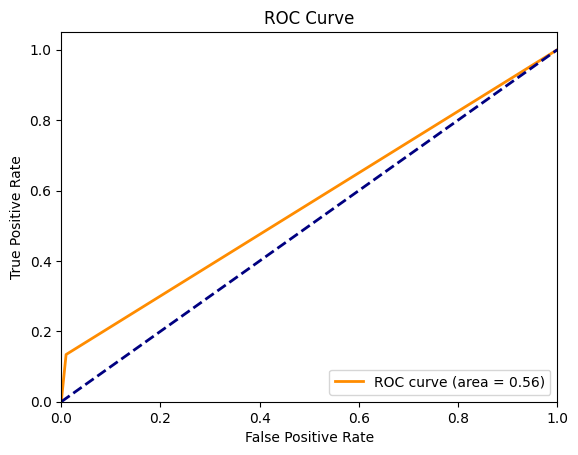

In [220]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [221]:
# from sklearn.metrics import precision_recall_curve

# # Compute precision-recall curve
# precision, recall, _ = precision_recall_curve(y_test, y_pred_nb)

# # Compute Average Precision (AP)
# average_precision = average_precision_score(y_test, y_pred_nb)

# # Plot Precision-Recall curve with AP
# plt.figure()
# plt.step(recall, precision, color='b', alpha=0.2, where='post')
# plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])
# plt.title('Precision-Recall Curve with AP={0:0.2f}'.format(average_precision))
# plt.show()


In [223]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# data.to_csv('part_transforded.csv')

**DECISION TREE**

In [224]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an instance of DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.9934802571166208
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10092
         1.0       0.97      0.94      0.96       798

    accuracy                           0.99     10890
   macro avg       0.98      0.97      0.98     10890
weighted avg       0.99      0.99      0.99     10890



In [225]:
from sklearn.metrics import f1_score

# Compute F1-score for Decision Tree
f1_dt = f1_score(y_test, y_pred_dt)
print("F1-Score for Decision Tree:", f1_dt)


F1-Score for Decision Tree: 0.955034832172261


In [228]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_dt)


Confusion Matrix for Decision Tree:
[[10065    27]
 [   44   754]]


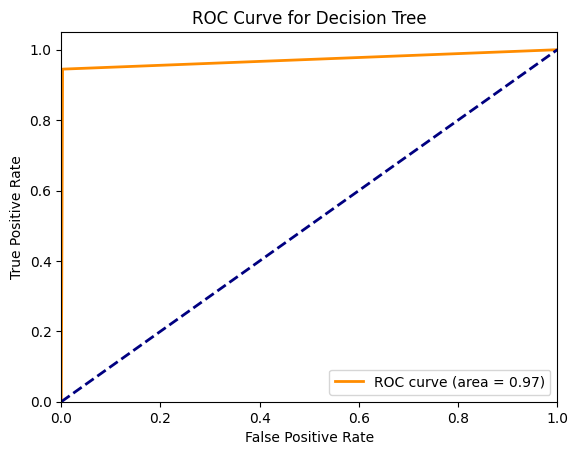

In [227]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve for Decision Tree
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()


**RANDOM FOREST**

In [230]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an instance of RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)

# Print classification report
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Accuracy (Random Forest): 0.9957759412304867
Classification Report (Random Forest):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10092
         1.0       0.96      0.98      0.97       798

    accuracy                           1.00     10890
   macro avg       0.98      0.99      0.98     10890
weighted avg       1.00      1.00      1.00     10890



In [231]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Assuming rf_classifier is the trained Random Forest classifier and X_test, y_test are the test data
y_pred_rf = rf_classifier.predict(X_test)
f1_rf = f1_score(y_test, y_pred_rf)
print("F1-Score (Random Forest):", f1_rf)


F1-Score (Random Forest): 0.9715346534653466


In [233]:
from sklearn.metrics import confusion_matrix

# Assuming rf_classifier is the trained Random Forest classifier and X_test, y_test are the test data
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)


Confusion Matrix (Random Forest):
[[10059    33]
 [   13   785]]


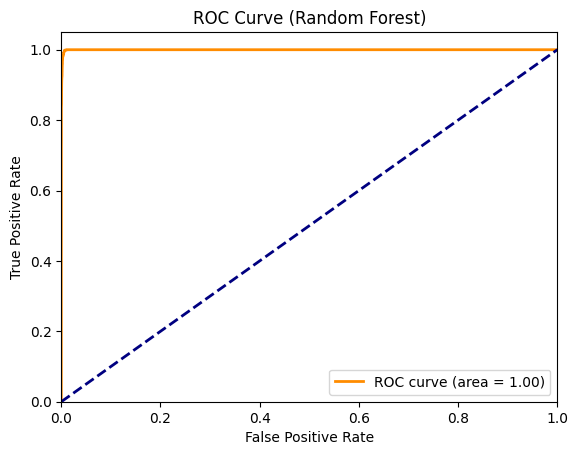

In [232]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming rf_classifier is the trained Random Forest classifier and X_test, y_test are the test data
y_score_rf = rf_classifier.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Random Forest
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()


**SUPPORT VECTOR MACHINE (SVM)**

In [234]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Create an instance of SVC (Support Vector Classifier)
svm_classifier = SVC(kernel='rbf')  # You can choose other kernels as well

# Fit the SVM classifier to the scaled training data
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Evaluate the performance of the classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm)

# Print classification report
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))


Accuracy (SVM): 0.9889807162534435
Classification Report (SVM):
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     10092
         1.0       0.93      0.92      0.92       798

    accuracy                           0.99     10890
   macro avg       0.96      0.96      0.96     10890
weighted avg       0.99      0.99      0.99     10890



In [235]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10038    54]
 [   66   732]]


In [236]:
# Compute F1-score
f1 = f1_score(y_test, y_pred_svm, average='weighted')
print("F1-Score:", f1)

F1-Score: 0.9889422502451186


In [237]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     10092
         1.0       0.93      0.92      0.92       798

    accuracy                           0.99     10890
   macro avg       0.96      0.96      0.96     10890
weighted avg       0.99      0.99      0.99     10890



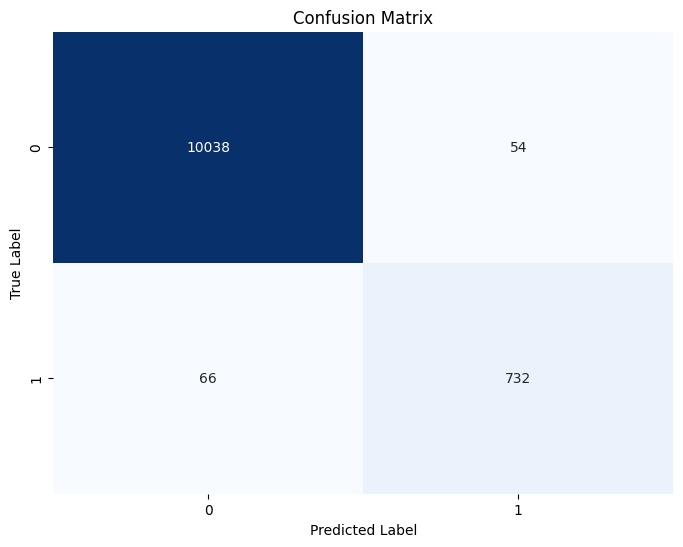

In [239]:
# Visualize confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [241]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **LOGISTIC REGRESSION**

In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Create an instance of Logistic Regression
lr_classifier = LogisticRegression()

# Fit the classifier to the training data
lr_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = lr_classifier.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(conf_matrix)

# Compute F1-score
f1 = f1_score(y_test, y_pred_lr, average='weighted')
print("F1-Score:", f1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Confusion Matrix:
[[10082    10]
 [  767    31]]
F1-Score: 0.8977515297936884
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     10092
         1.0       0.76      0.04      0.07       798

    accuracy                           0.93     10890
   macro avg       0.84      0.52      0.52     10890
weighted avg       0.92      0.93      0.90     10890

